In [1]:
import pandas as pd
import nltk
import sklearn
import textblob
from textblob import TextBlob
import matplotlib
import seaborn

In [2]:
dataset=pd.read_csv("D:/psychatric symptom detection data/tweetss.csv",encoding="latin-1")

In [3]:
dataset.head()

,tweets,Sex,symptom,type,Level
0,Do You Think You Might Be Going Insane Again?,1,1,1,Severe
1,The Day My Heart Broke  Part Two,1,1,3,Severe
2,New #blog post alert! I discuss depression and...,1,1,3,Severe
3,Bipolar Disorder  My Super Power,1,1,2,Severe
4,Finally its Christmas drink season @starbucks...,1,0,0,None


In [4]:
dataset['tweets']

0           Do You Think You Might Be Going Insane Again?
1                      The Day My Heart Broke  Part Two 
2       New #blog post alert! I discuss depression and...
3                      Bipolar Disorder  My Super Power 
4       Finally its Christmas drink season @starbucks...
5                   Feeling #witchy @urbandecaycosmetics 
6       Read about my second #manicpsychosis on my blo...
7            Overcoming My Anxiety  An Artists Struggle
8               The Anxiety Is Real
An Artists Struggle 
9       #GetLoud I have bipolar disorder but being bip...
10      Read my latest blog post about #mentalhealthaw...
11      Mental Health Awareness Month  What Does Bein...
12                            Its a #deadlift kinda day!
13      Joined the new gym everyone hyping #crunchfitn...
14                    What Does My Depression Look Like? 
15                        The Day My Heart Broke  Day 1 
16       I think this is great! I am a mental health b...
17      RT @in

In [5]:
dataset['tweets']=dataset.tweets.astype(str)

In [6]:
dataset['polarity']=dataset['tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.polarity)

In [7]:
dataset['subjectivity']=dataset['tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.subjectivity)


In [8]:
dataset.head()

,tweets,Sex,symptom,type,Level,polarity,subjectivity
0,Do You Think You Might Be Going Insane Again?,1,1,1,Severe,-1.000000,1.000000
1,The Day My Heart Broke  Part Two,1,1,3,Severe,0.000000,0.000000
2,New #blog post alert! I discuss depression and...,1,1,3,Severe,-0.132792,0.622078
3,Bipolar Disorder  My Super Power,1,1,2,Severe,0.333333,0.666667
4,Finally its Christmas drink season @starbucks...,1,0,0,None,0.000000,1.000000


In [9]:
#import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.style.use('ggplot')
from subprocess import check_output
from nltk.tokenize import ToktokTokenizer
toktok=ToktokTokenizer()

In [10]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df=dataset
df.head()
df.tail()

,tweets,Sex,symptom,type,Level,polarity,subjectivity
3994,I guess I'm gonna travel. Just fearful (very f...,1,1,2,Severe,-0.680000,0.773333
3995,RT @halsey : No jokes right now. I have dedica...,1,1,2,Severe,0.142857,0.417857
3996,Do yourselves a favor... dont EVER date a per...,1,1,2,Severe,0.468750,0.800000
3997,"@LCNSB_ I'm sorry, because I suffer from sever...",1,1,2,Severe,-0.400000,0.638889
3998,RT @StrugglingAnon_ : Honestly I am so fucking...,1,1,2,Highly severe,0.200000,0.500000


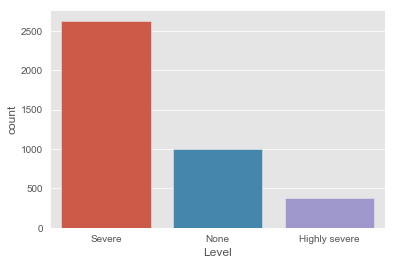

In [12]:
# Value Count 
sns.countplot(df['Level'])

In [13]:
import re
def initial_clean(tweets):
    """
    Function to clear text of websites,email addresses and any punctuation
    We also lower case the text
    """
    tweets=re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)"," ",tweets)
    tweets=re.sub("[^a-zA-Z]"," ",tweets)
    tweets=tweets.lower()
    #text=nltk.word_tokenize(text)
    tweets=toktok.tokenize(tweets)
    return tweets
#stop_words=stopwords.words('english')
'''
def remove_stop_words(tweets):
    
    Function that removes all stopwords from text
    
    return [word for word in message if word not in stop_words] '''
stemmer=PorterStemmer()
def stem_words(tweets):  
    '''
    Function to stem words so that plural and singular are treated the same
    '''
    try:
        tweets=[stemmer.stem(word) for word in tweets]
        tweets=[word for word in tweets if len(word)>1] #make sure we have no 1 letter words
    except IndexError: #the word 'oed' broke this,so needed try except
        pass
    return tweets
def apply_all(tweets):
    '''
    This function applies all the function above into one  remove_stop_words
    '''
    
    return stem_words(initial_clean(tweets))


In [14]:
#clean message and tweets and create new column 'tokenized'
import time
t1=time.time()
df['tokenized']=df['tweets'].apply(apply_all) + df['tweets'].apply(apply_all)
t2=time.time()
print("Time to clean and tokenize",len(df),"articles: ",(t2-t1)/60,"min")


Time to clean and tokenize 3999 articles:  0.49659117857615154 min


In [15]:
#df.head()
lst=[]
for i in range(0,len(df)):
    x=df['tokenized'][i]
    ap=" ".join(x)
#for xx in x:
#    ap="".join(xx)
    lst.append(ap)
print(lst[1])

the day my heart broke part two the day my heart broke part two


In [16]:
df['list']=lst

In [17]:
df.head()

,tweets,Sex,symptom,type,Level,polarity,subjectivity,tokenized,list
0,Do You Think You Might Be Going Insane Again?,1,1,1,Severe,-1.000000,1.000000,"[do, you, think, you, might, be, go, insan, ag...",do you think you might be go insan again do yo...
1,The Day My Heart Broke  Part Two,1,1,3,Severe,0.000000,0.000000,"[the, day, my, heart, broke, part, two, the, d...",the day my heart broke part two the day my hea...
2,New #blog post alert! I discuss depression and...,1,1,3,Severe,-0.132792,0.622078,"[new, blog, post, alert, discuss, depress, and...",new blog post alert discuss depress and my per...
3,Bipolar Disorder  My Super Power,1,1,2,Severe,0.333333,0.666667,"[bipolar, disord, my, super, power, bipolar, d...",bipolar disord my super power bipolar disord m...
4,Finally its Christmas drink season @starbucks...,1,0,0,None,0.000000,1.000000,"[final, it, christma, drink, season, hello, pe...",final it christma drink season hello peppermin...


In [18]:
df.dtypes

tweets           object
Sex               int64
symptom           int64
type              int64
Level            object
polarity        float64
subjectivity    float64
tokenized        object
list             object
dtype: object

In [19]:
len(df)

3999

In [20]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(2,2))
x_feature = vectorizer.fit_transform(lst).toarray()
#y_train = train.drop(labels = ['tweets'], axis=1)
#x_test = vectorizer.transform(test).toarray()

In [21]:
x=pd.DataFrame(x_feature)
k=df[['Sex','polarity','subjectivity','symptom','type']]
p=pd.DataFrame(k)
X=pd.concat([x,p],axis=1)
#x_feature.shape
X

,0,1,2,3,4,5,6,7,8,9,...,43842,43843,43844,43845,43846,Sex,polarity,subjectivity,symptom,type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1.000000,1.000000,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-0.132792,0.622078,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.333333,0.666667,1,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,1.000000,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.400000,0.450000,1,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.200000,0.300000,1,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,2


In [22]:
y=df[['Level']]

In [23]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [24]:
from sklearn import metrics
import numpy as np
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000 )

from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore1=cross_val_score(logreg,X,np.ravel(y),cv=5)
y_pred=cross_val_predict(logreg,X,np.ravel(y),cv=5)
cvscore1,cvscore1.mean()

(array([0.91875   , 0.9275    , 0.94875   , 0.94875   , 0.96745932]),
 0.9422418648310387)

Accuracy of LogisticRegression with cv:0.9422418648310387
Confusion matrix, without normalization


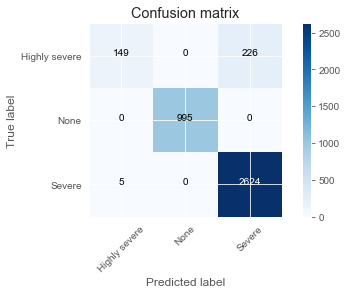

In [27]:
print('Accuracy of LogisticRegression with cv:'+str(cvscore1.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.97      0.40      0.56       375
         None       1.00      1.00      1.00       995
       Severe       0.92      1.00      0.96      2629

     accuracy                           0.94      3999
    macro avg       0.96      0.80      0.84      3999
 weighted avg       0.94      0.94      0.93      3999



In [29]:
totacu=round((metrics.accuracy_score(y,y_pred)*100),3)
totacu

94.224

In [30]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000 )

from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore2=cross_val_score(logreg,x,np.ravel(y),cv=10)
y_pred=cross_val_predict(logreg,x,np.ravel(y),cv=10)
cvscore2,cvscore2.mean()

(array([0.685     , 0.675     , 0.64      , 0.715     , 0.7       ,
        0.6925    , 0.7375    , 0.7125    , 0.855     , 0.86716792]),
 0.7279667919799498)

Accuracy of LogisticRegression with cv:0.7279667919799498
Confusion matrix, without normalization


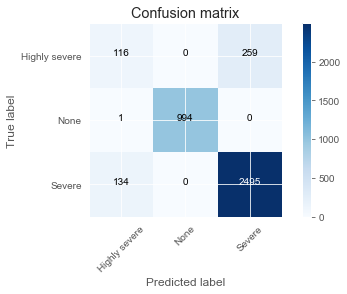

In [54]:
print('Accuracy of LogisticRegression with cv:'+str(cvscore2.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.94      0.45      0.61       375
         None       0.62      0.27      0.37       995
       Severe       0.73      0.94      0.82      2629

     accuracy                           0.73      3999
    macro avg       0.76      0.55      0.60      3999
 weighted avg       0.72      0.73      0.69      3999



In [33]:
from sklearn.svm import LinearSVC
svmmodel= LinearSVC(C=1, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
cvscore3=cross_val_score(svmmodel,X,np.ravel(y),cv=5)
y_pred=cross_val_predict(svmmodel,X,np.ravel(y),cv=5)
cvscore3,cvscore3.mean()

(array([0.92125   , 0.9325    , 0.94875   , 0.94875   , 0.96745932]),
 0.9437418648310387)

Accuracy of SVM with cv:0.9437418648310387
Confusion matrix, without normalization


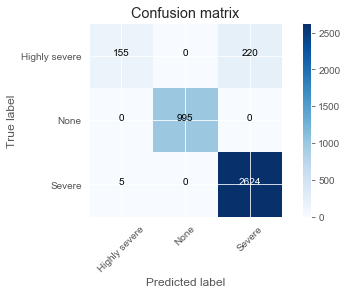

In [34]:
print('Accuracy of SVM with cv:'+str(cvscore3.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.97      0.41      0.58       375
         None       1.00      1.00      1.00       995
       Severe       0.92      1.00      0.96      2629

     accuracy                           0.94      3999
    macro avg       0.96      0.80      0.85      3999
 weighted avg       0.95      0.94      0.93      3999



In [37]:
from sklearn.svm import LinearSVC
svmmodel= LinearSVC(C=1, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
cvscore4=cross_val_score(svmmodel,X,np.ravel(y),cv=10)
y_pred=cross_val_predict(svmmodel,X,np.ravel(y),cv=10)
cvscore4,cvscore4.mean()

(array([0.9175    , 0.93      , 0.9225    , 0.935     , 0.945     ,
        0.955     , 0.9575    , 0.9425    , 0.97      , 0.96741855]),
 0.9442418546365914)

Accuracy of SVM with cv:0.9442418546365914
Confusion matrix, without normalization


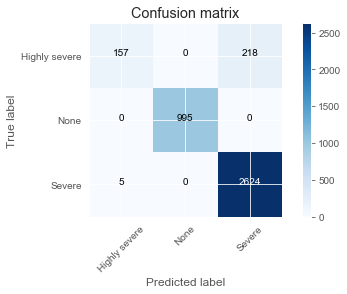

In [38]:
print('Accuracy of SVM with cv:'+str(cvscore4.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.97      0.42      0.58       375
         None       1.00      1.00      1.00       995
       Severe       0.92      1.00      0.96      2629

     accuracy                           0.94      3999
    macro avg       0.96      0.81      0.85      3999
 weighted avg       0.95      0.94      0.93      3999



In [40]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore5=cross_val_score(Random,X,np.ravel(y),cv=5)
y_pred=cross_val_predict(Random,X,np.ravel(y),cv=5)

In [41]:
cvscore5,cvscore5.mean()

(array([0.92125   , 0.92875   , 0.95375   , 0.96125   , 0.97246558]),
 0.9474931163954944)

Accuracy of RF with cv:0.9474931163954944
Confusion matrix, without normalization


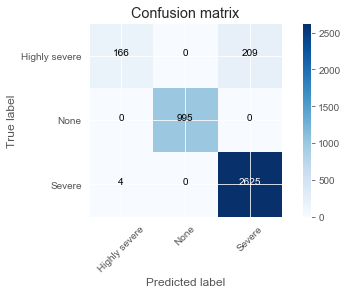

In [42]:
print('Accuracy of RF with cv:'+str(cvscore5.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.98      0.44      0.61       375
         None       1.00      1.00      1.00       995
       Severe       0.93      1.00      0.96      2629

     accuracy                           0.95      3999
    macro avg       0.97      0.81      0.86      3999
 weighted avg       0.95      0.95      0.94      3999



In [44]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore6=cross_val_score(Random,X,np.ravel(y),cv=10)
y_pred=cross_val_predict(Random,X,np.ravel(y),cv=10)

C:\Users\Merry\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Merry\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Merry\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [45]:
cvscore6,cvscore6.mean()

(array([0.915     , 0.9275    , 0.9125    , 0.945     , 0.935     ,
        0.955     , 0.97      , 0.9525    , 0.98      , 0.96992481]),
 0.9462424812030076)

Accuracy of RF with cv:0.9462424812030076
Confusion matrix, without normalization


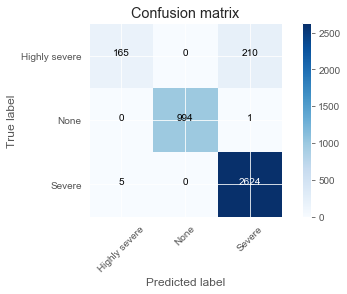

In [46]:

print('Accuracy of RF with cv:'+str(cvscore6.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.97      0.44      0.61       375
         None       1.00      1.00      1.00       995
       Severe       0.93      1.00      0.96      2629

     accuracy                           0.95      3999
    macro avg       0.97      0.81      0.86      3999
 weighted avg       0.95      0.95      0.94      3999



In [48]:
nb_model = GaussianNB()
cvscore7=cross_val_score(nb_model,X,np.ravel(y),cv=5)
y_pred=cross_val_predict(nb_model,X,np.ravel(y),cv=5)
cvscore7,cvscore7.mean()

(array([0.885     , 0.84625   , 0.90125   , 0.91      , 0.94242804]),
 0.8969856070087608)

Accuracy of NB with cv:0.8969856070087608
Confusion matrix, without normalization


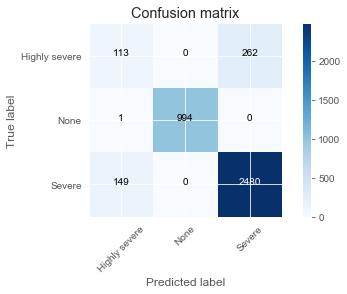

In [49]:
print('Accuracy of NB with cv:'+str(cvscore7.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.43      0.30      0.35       375
         None       1.00      1.00      1.00       995
       Severe       0.90      0.94      0.92      2629

     accuracy                           0.90      3999
    macro avg       0.78      0.75      0.76      3999
 weighted avg       0.88      0.90      0.89      3999



In [51]:
nb_model = GaussianNB()
cvscore8=cross_val_score(nb_model,X,np.ravel(y),cv=10)
y_pred=cross_val_predict(nb_model,X,np.ravel(y),cv=10)
cvscore8,cvscore8.mean()

(array([0.8875    , 0.8825    , 0.8675    , 0.845     , 0.91      ,
        0.9075    , 0.915     , 0.91      , 0.94      , 0.94987469]),
 0.9014874686716791)

Accuracy of NB with cv:0.9014874686716791
Confusion matrix, without normalization


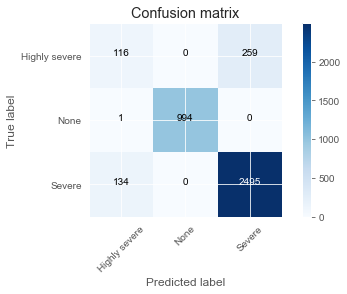

In [52]:
print('Accuracy of NB with cv:'+str(cvscore8.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

Highly severe       0.46      0.31      0.37       375
         None       1.00      1.00      1.00       995
       Severe       0.91      0.95      0.93      2629

     accuracy                           0.90      3999
    macro avg       0.79      0.75      0.77      3999
 weighted avg       0.89      0.90      0.89      3999

